## Citation  
#### Lewis, M., Liu, Y., Goyal, N., Ghazvininejad, M., Mohamed, A., Levy, O., Stoyanov, V., & Zettlemoyer, L. (2020). BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension. arXiv:1910.13461. https://doi.org/10.48550/arXiv.1910.13461

#### This notebook is a personal explanation and walkthrough of the paper *BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension*. All credit for the original research goes to the authors listed above.

**Image Attribution**

#### Unless otherwise noted, all figures in this notebook are either original or sourced from Lewis et al., 2019 – *BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension*.


# BART (Bidirectional and AutoRegressive Transformer)

##### BART uses BERT like Encoder and GPT like Decoder. It is trained on corrupted documents and once pre-trained, it is used in various tasks like Translation, Summarization, etc.
##### Let's look at the comparision between BART and BERT, GPT

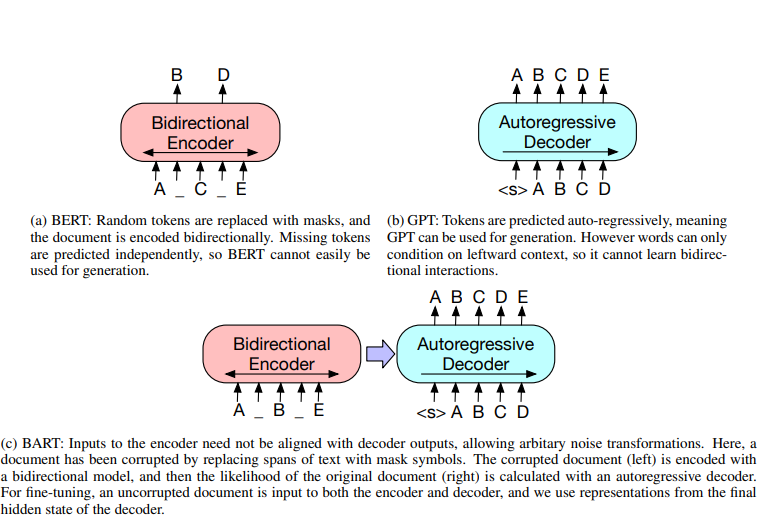

In [1]:
%matplotlib inline
from IPython.display import Image
Image('Images/BART compared to BERT, GPT.png')

##### As we can see in the image, BERT uses encoder, GPT uses Decoder but BART uses both. The difference between BART and the traditional Transformer is the way how BART is trained. 

##### It has two phases: Pre-training and Fine-tuning

# 1) Pre-Training

##### BART uses corrupted document to learn the document (inputs). It is then optimized using cross-entropy loss between the predicted output and the original output. It uses noising while pre-training. Let's look at the Transformations available for this.

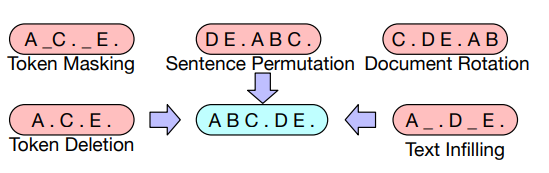

In [2]:
%matplotlib inline
from IPython.display import Image
Image('Images/Transformations for noising.png')

##### There are 5 Transformations given in the paper:

# i) Token Masking
##### It is similar to BERT's Masked Language Model (MLM). We use the [MASK] tag/token to hide the word and then BART must learn and predict the word.
##### Example: "Earth is in the [MASK] System" -> Solar

# ii) Sentence Permuation
##### Sentences are shuffled randomly.
##### Example: "Earth is in the Solar System. It is one of the planets in the Solar System" -> "It is one of the planets in the Solar System. Earth is in the Solar System"

# iii) Document Rotation
##### The beginning of the sentence is rotated so that BART learns how the beginning of a sentence looks like.
##### Example: "Earth is in the Solar System." -> "the Solar System. Earth is in"

# iv) Token Detection
##### Random tokens are removed. This is hard because BART doesn't know which word (token) is removed.
##### Example: "Earth is in the Solar System." -> "Earth is in the System."

# v) Text Infilling
##### Random span of text is replaced by the [MASK] token
##### Example: "Earth is in [MASK] System." -> "Earth is in the Solar System."

# 2) Fine-tuning


##### BART can be used in many downstream tasks.

# i)  Sequence Classification Tasks
##### Classifies the input into categories. Example taks are Sentiment Analysus and NLI.

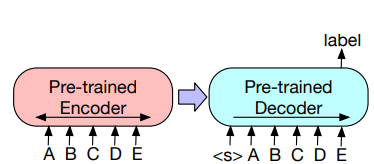

In [1]:
%matplotlib inline
from IPython.display import Image
Image('Images/classification.png')

##### In the above image, BART achieved classification using Encoder and Decoder by providing the same input. Although, Encoder is only enough, Decoder is used to maintain uniformity.

# ii) Token Classification
##### Classifies each individual word or token. It's like the model is asking "For each word, is it the answer? or a name? etc"

# iii) Sequence Generation
##### Generates new words based on the previous words
##### Example: "Hello, How are" -> "you"

# iv) Machine Translation
##### Translating a non-English language into English.

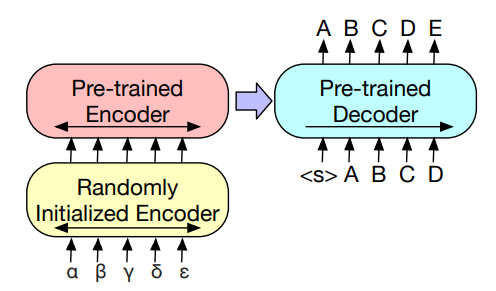

In [1]:
%matplotlib inline
from IPython.display import Image
Image('Images/Machine Translation.png')

##### As given in the image, BART uses a Randomly Intiated Encoder. This new encoder is used to understand the non-english language. Then BART's decoder is used to generate the english translation.

# Conclusion
##### BART has the strengths of both BERT-like Encoders and GPT-like Decoders. It can perform a variety of BERT tasks such as classification, NLI, etc and also GPT tasks like Text generation, Translation, etc.